In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt
import seaborn as sns
mpt.style.use("dark_background")

In [43]:
data = pd.read_csv('Zomato data .csv')

In [45]:
print(data)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [47]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [49]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Data Cleaning and Preprocessing

In [51]:
## Check for null values
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [53]:
## Description of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [59]:
## Changing the data type of rate column

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

data['rate'] = data['rate'].apply(handleRate)

In [61]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


1. What type of restaurant do the majority of customers order from ?

Text(0, 0.5, 'Number of Orders')

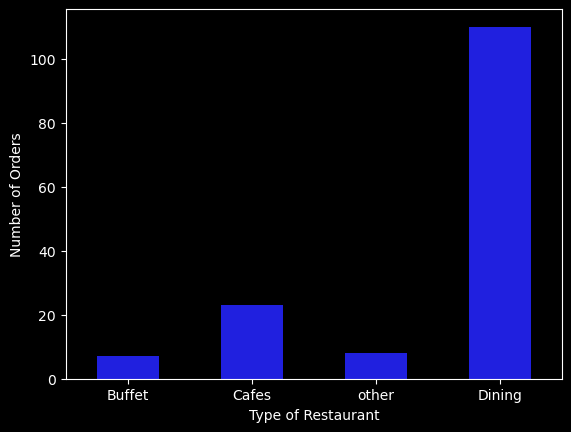

In [326]:
sns.countplot(x='listed_in(type)', data = data, width=0.5, color = 'blue')
mpt.xlabel("Type of Restaurant")
mpt.ylabel("Number of Orders")

Majority of Customers order from Dining Restaurants

2. How many votes has each type of restaurant recieved from customers ? 

In [104]:
grouped_data = data.groupby(['listed_in(type)'])['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [106]:
result_df = pd.DataFrame({'Votes':grouped_data})
result_df

,Votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Number of Votes')

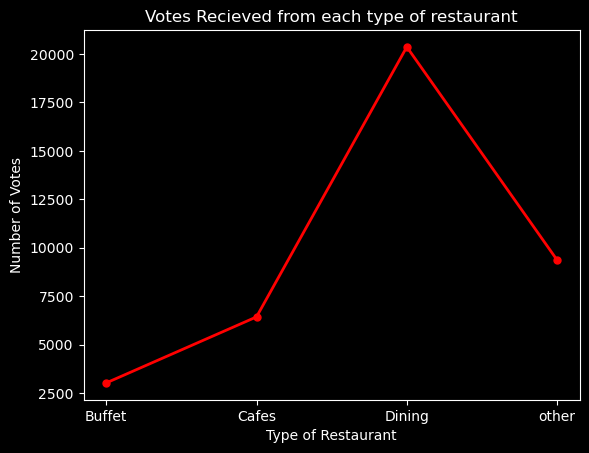

In [328]:
mpt.plot(result_df,color='red',marker='.',linewidth = 2,markersize=10)
mpt.title('Votes Recieved from each type of restaurant')
mpt.xlabel('Type of Restaurant')
mpt.ylabel('Number of Votes')

Dining Restaurant has recieved maximum number of votes

3. What are the ratings that the majority of restaurants have recieved ?

<Axes: xlabel='rate', ylabel='Count'>

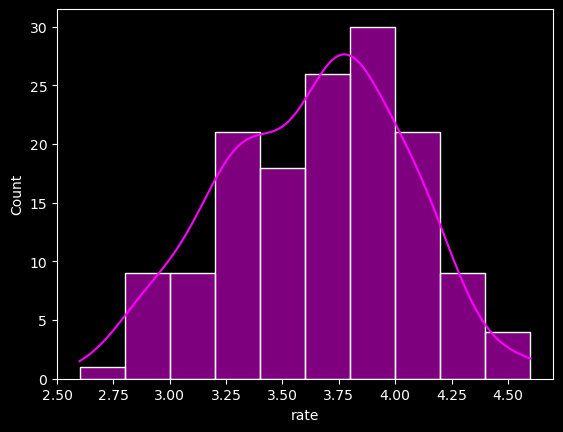

In [344]:
sns.histplot(x='rate',data=data,bins=10,color='magenta',kde=True)

Majority of Restaurants have recieved ratings between 3.5 and 4

In [175]:
grouped_data = data.groupby('listed_in(type)')['rate'].mean()
grouped_data_frame = pd.DataFrame({'Average_Ratings':grouped_data})
grouped_data_frame

,Average_Ratings
listed_in(type),
Buffet,3.842857
Cafes,3.765217
Dining,3.571818
other,3.912500


In [334]:
mpt.pie(x=grouped_data_frame['Average_Ratings'],labels=['Buffet','Cafes','Dining','Other'],autopct="%1.1f%%",explode)

KeyError: 'Average_Ratings'

Other type of Restaurants has recieved the best average ratings.

4. Zomato has observed that most couple order most of their food online. What is their average spending on each order ?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

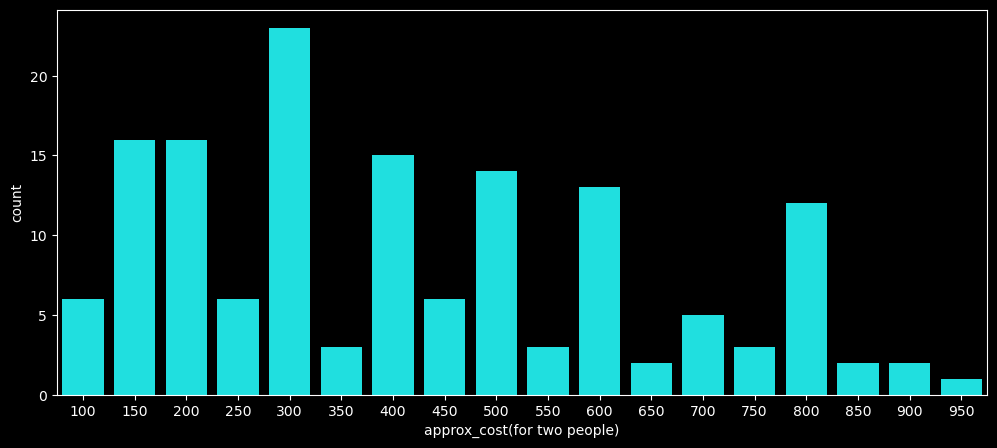

In [336]:
mpt.figure(figsize=(12,5))
sns.countplot(x='approx_cost(for two people)',data = data,color = 'cyan')

The majority of couples prefer restaurants with an approximate cost of 300 for 2 people.

5. Which mode(online or offline) has recieved maximum ratings ?

In [259]:
grouped_data = data.groupby('online_order')['rate'].mean()
grouped_data_frame = pd.DataFrame({"Average_Rating":grouped_data})
grouped_data_frame

,Average_Rating
online_order,
No,3.487778
Yes,3.858621


<Axes: xlabel='online_order', ylabel='rate'>

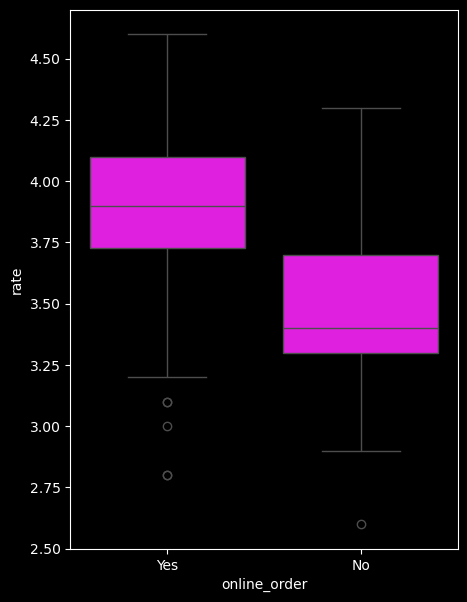

In [338]:
mpt.figure(figsize=(5,7))
sns.boxplot(x='online_order',y='rate',data = data, color='magenta')

Online Order have recieved better ratings in comparison to Offline Orders

6. Which type of restaurants recieved more offline orders, so that Zomato can provide those customers with good offers ?

In [281]:
pivot_table = data.pivot_table(index="listed_in(type)",columns = "online_order", aggfunc = 'size',fill_value = 0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


Text(0.5, 23.52222222222222, 'Online Order')

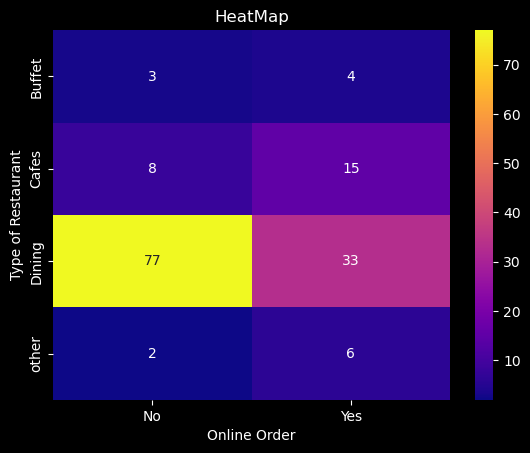

In [340]:
sns.heatmap(pivot_table,annot = True,cmap = 'plasma')
mpt.title('HeatMap')
mpt.ylabel('Type of Restaurant')
mpt.xlabel('Online Order')

Dining Restaurants primarily accept offline orders, whereas Cafes primarily recieve online orders. This suggest that customers prefer to place order in person at restaurants, but prefer online ordering at cafes.

In [318]:
data.groupby('listed_in(type)')['listed_in(type)'].count()

listed_in(type)
Buffet      7
Cafes      23
Dining    110
other       8
Name: listed_in(type), dtype: int64